In [57]:
import pandas as pd
import dataframe_image as dfi
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from random import randint

In [16]:
headers = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
data = pd.read_csv('heart.csv', header=0, names=headers)

In [17]:
features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
X = data[features]
y = data.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [19]:
def runTest(criterion="gini",max_depth=None,splitter="best") -> tuple:
    clf = DecisionTreeClassifier(criterion=criterion,splitter=splitter,max_depth=max_depth)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = round(metrics.accuracy_score(y_test, y_pred)*100,4)
    return (criterion, splitter, max_depth, accuracy, clf)
    return f"Criterion: {criterion}, Splitter: {splitter}, Max Depth:  {max_depth}, Accuracy: {accuracy}%"

In [25]:
def getRandInputs(ceiling=20) -> tuple:
    max_depth = randint(1,ceiling)
    if randint(0,1) == 1:
        criterion = "entropy"
    else:
        criterion = "gini"
    if randint(0,1) == 1:
        splitter = "best"
    else:
        splitter = "random"
    return (criterion,max_depth,splitter)

In [34]:
results_clfs = [DecisionTreeClassifier() for _ in range(0,10)]
results_strs = ['' for _ in range(0,10)]
results_vals = [0 for _ in range(0,10)]
results_tbl = [[] for _ in range(0,10)]
i = 0
while i < 10:
    inputs = getRandInputs()
    j = 0
    while j < 10:
        result = runTest(criterion=inputs[0],max_depth=inputs[1],splitter=inputs[2])
        if result[3] > results_vals[i]:
            results_vals[i] = result[3]
            results_strs[i] = f"Test #{i+1} Criterion: {result[0]}, Splitter: {result[1]}, Max Depth:  {result[2]}, Accuracy: {result[3]}%"
            results_clfs[i] = result[4]
            results_tbl[i] = [i+1,result[0],result[1],result[2],result[3]]
        j += 1
    dot_data = StringIO()
    export_graphviz(results_clfs[i], out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = features,class_names=['0','1'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(f'images/heart_disease_test_{i+1}.png')
    i += 1
results_strs

['Test #1 Criterion: entropy, Splitter: random, Max Depth:  3, Accuracy: 71.4286%',
 'Test #2 Criterion: entropy, Splitter: best, Max Depth:  20, Accuracy: 73.6264%',
 'Test #3 Criterion: gini, Splitter: random, Max Depth:  16, Accuracy: 74.7253%',
 'Test #4 Criterion: gini, Splitter: best, Max Depth:  18, Accuracy: 73.6264%',
 'Test #5 Criterion: entropy, Splitter: best, Max Depth:  3, Accuracy: 73.6264%',
 'Test #6 Criterion: gini, Splitter: random, Max Depth:  7, Accuracy: 72.5275%',
 'Test #7 Criterion: entropy, Splitter: random, Max Depth:  13, Accuracy: 72.5275%',
 'Test #8 Criterion: entropy, Splitter: best, Max Depth:  20, Accuracy: 72.5275%',
 'Test #9 Criterion: entropy, Splitter: random, Max Depth:  17, Accuracy: 76.9231%',
 'Test #10 Criterion: entropy, Splitter: random, Max Depth:  14, Accuracy: 74.7253%']

In [61]:
results_headers = {0: "Test #",1: "Criterion",2: "Splitter",3: "Max Depth", 4: 'Accuracy'}
results_df = pd.DataFrame(list(map(np.ravel, results_tbl)))
results_df.rename(columns=results_headers,inplace=True)
results_df.set_index('Test #',inplace=True)

In [62]:
dfi.export(results_df,'images/heart_disease_table.png')

objc[39618]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x2476f32e0) and /Applications/Brave Browser.app/Contents/Frameworks/Brave Browser Framework.framework/Versions/107.1.45.113/Libraries/libGLESv2.dylib (0x10dcd40d8). One of the two will be used. Which one is undefined.
[1028/203529.740366:INFO:headless_shell.cc(657)] Written to file /var/folders/dx/3d5b40x125j2tmc2qnbmzg7c0000gn/T/tmp4blfykhj/temp.png.


<AxesSubplot: >

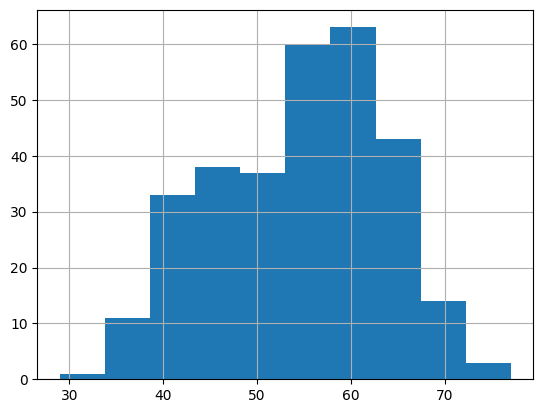

In [28]:
data.age.hist()

<AxesSubplot: >

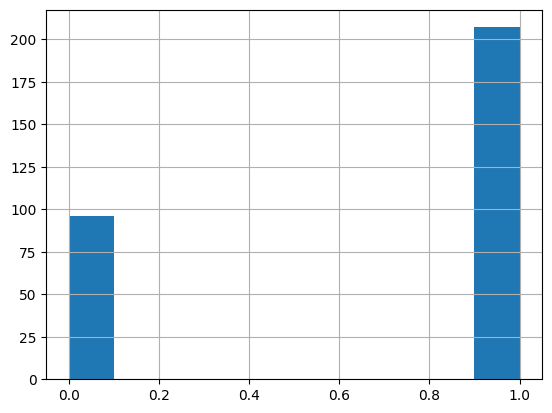

In [31]:
data.sex.hist()

<AxesSubplot: >

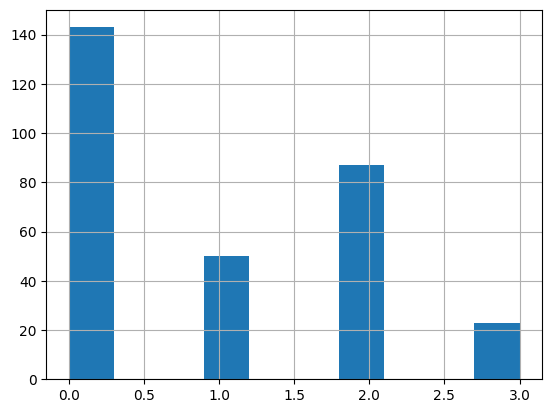

In [32]:
data.cp.hist()